# *Problem Statement*

*An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.*

*The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.*

*There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.*

### Business Goal:

***The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.***

**Our Goals for the Case Study:**
* Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
* In the future, the company's requirements might change, so you will have to adjust.

## 1. Importing the Libraries

In [1]:
# Importing the Required Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('classic')
sns.set()

# setting up pandas to view large files
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## *2. Loading the Data.*

In [2]:
xleads = pd.read_csv('Leads.csv')
xleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### *2.1 Inspecting the Dataframes.*

In [3]:
# Checking the Dimensions of the Dataframe 'xleads'
print('Dimension:' , xleads.shape)

Dimension: (9240, 37)


In [4]:
# xleads information
xleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
# Check the summary for the numeric columns.
xleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## *3. Data Cleaning & Data Processing.*

### *3.1 Treating Null Values.*

In [6]:
# Checking for duplicates in 'Prospect ID'.
print('Duplicates in Prospect ID:',sum(xleads.duplicated(subset = 'Prospect ID')) == 0)

# Checking for duplicates in 'Lead Number'.
print('Duplicates in Lead Number:',sum(xleads.duplicated(subset = 'Lead Number')) == 0)

Duplicates in Prospect ID: True
Duplicates in Lead Number: True


In [7]:
# Dropping 'Lead Number' and 'Prospect ID' since they have all unique values
print('Original data:' , xleads.shape)
xleads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)
print('Treated data :' , xleads.shape)

Original data: (9240, 37)
Treated data : (9240, 35)


In [8]:
# As we can observe from the data there are quite a Columns which has 'Select' as one of the category. 
# This might be because the applicant might have not filled this field. Hence we will be replacing 'Select' with NaN.

xleads = xleads.replace('Select', np.nan)
xleads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [9]:
# Now checking the Percentage of null values present in each columns in the data 'xleads'.
round(xleads.isnull().sum() * 100 / len(xleads) , 4).sort_values(ascending = False)

How did you hear about X Education               78.4632
Lead Profile                                     74.1883
Lead Quality                                     51.5909
Asymmetrique Profile Score                       45.6494
Asymmetrique Activity Score                      45.6494
Asymmetrique Profile Index                       45.6494
Asymmetrique Activity Index                      45.6494
City                                             39.7078
Specialization                                   36.5801
Tags                                             36.2879
What matters most to you in choosing a course    29.3182
What is your current occupation                  29.1126
Country                                          26.6342
TotalVisits                                       1.4827
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Lead Source                                       0.3896
Do Not Call                    

In [10]:
# Number of columns have percentage of null values >= 40%.
len(xleads.columns[xleads.isnull().mean() >= 0.40])

7

In [11]:
# Dropping the columns having percentage of null values >= 40%. 
# And checking the Dimensions of original('xleads') and treated data('xleads').
print('Original data:' , xleads.shape)

cols = xleads.columns
for i in cols:
    if((100*(xleads[i].isnull().sum()/len(xleads.index))) >= 40):
        xleads.drop(i, 1, inplace = True)
        
print('Treated data :' , xleads.shape)

Original data: (9240, 35)
Treated data : (9240, 28)


In [12]:
# Now checking the Percentage of null values present in each columns in the data 'xleads'.
round(xleads.isnull().sum() * 100 / len(xleads) , 4).sort_values(ascending = False)

City                                             39.7078
Specialization                                   36.5801
Tags                                             36.2879
What matters most to you in choosing a course    29.3182
What is your current occupation                  29.1126
Country                                          26.6342
TotalVisits                                       1.4827
Page Views Per Visit                              1.4827
Last Activity                                     1.1147
Lead Source                                       0.3896
Last Notable Activity                             0.0000
Do Not Email                                      0.0000
Do Not Call                                       0.0000
Converted                                         0.0000
Total Time Spent on Website                       0.0000
Search                                            0.0000
A free copy of Mastering The Interview            0.0000
Magazine                       

In [13]:
# Let's check the value_counts in 'Country'
xleads['Country'].value_counts(normalize = True, dropna=False)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
France                   0.064935
Oman                     0.064935
unknown                  0.054113
Germany                  0.043290
Nigeria                  0.043290
South Africa             0.043290
Canada                   0.043290
Kuwait                   0.043290
Sweden                   0.032468
Bangladesh               0.021645
China                    0.021645
Asia/Pacific Region      0.021645
Ghana                    0.021645
Netherlands              0.021645
Belgium                  0.021645
Philippines              0.021645
Italy                    0.021645
Uganda                   0.021645
Switzerland   

#### Insights:
* As we can observe that *'India'* is the most common occurence among the non-missing values in the feature *'Country*, hence we can impute all missing values with India.

In [14]:
# Imputing null values with 'India'
xleads['Country'] = xleads['Country'].replace(np.nan,'India')

# Let's again check the value_counts in 'Country'
xleads['Country'].value_counts(normalize = True, dropna=False)*100

India                   96.893939
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Germany                  0.043290
South Africa             0.043290
Kuwait                   0.043290
Nigeria                  0.043290
Canada                   0.043290
Sweden                   0.032468
Netherlands              0.021645
Bangladesh               0.021645
Asia/Pacific Region      0.021645
Philippines              0.021645
Ghana                    0.021645
Italy                    0.021645
China                    0.021645
Belgium                  0.021645
Uganda                   0.021645
Kenya                    0.010823
Indonesia     

#### Insights:
* As we can see the Number of Values for *'India'* are quite high (nearly about 97% of the Data), since this will make our data skewed, so this column should be dropped.

In [15]:
# Creating a list of columns to be droppped.
cols_to_drop = ['Country']

# Let's check the value_counts in 'City'
xleads['City'].value_counts(normalize = True, dropna=False)*100

NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

#### Insights:
* As we can observe that 'Mumbai' is the most common occurence among the non-missing values in the feature 'City, hence we can impute all missing values with India.

In [16]:
xleads['City'] = xleads['City'].replace(np.nan,'Mumbai')
# Let's check the value_counts in 'City'
xleads['City'].value_counts(normalize = True, dropna=False)*100

Mumbai                         74.577922
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64

In [17]:
# Let's check the value_counts in 'Specialization'
xleads['Specialization'].value_counts(normalize = True, dropna=False)*100

NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [18]:
# Lead may not have mentioned *'Specialization'* because it was not in the list or maybe they are a students,
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

xleads['Specialization'] = xleads['Specialization'].replace(np.nan, 'Not Specified')

# Let's again check the value_counts in 'Specialization'
xleads['Specialization'].value_counts(normalize = True, dropna=False)*100

Not Specified                        36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Media and Advertising                 2.196970
Travel and Tourism                    2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

#### Insights:
* We see that *'Specialization'* with *'Management'* in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.
* Hence we will be combining Management Specializations because they are showing similar trends.

In [19]:
xleads['Specialization'] = xleads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                             'Marketing Management','Operations Management',
                                                             'IT Projects Management','Supply Chain Management',
                                                             'Healthcare Management','Hospitality Management',
                                                             'Retail Management'] , 'Management_Specializations') 

# Let's again check the value_counts in 'Specialization'
xleads['Specialization'].value_counts(normalize = True, dropna=False)*100

Management_Specializations           46.028139
Not Specified                        36.580087
Business Administration               4.361472
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
E-COMMERCE                            1.212121
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64

In [20]:
# Let's check the value_counts in 'What is your current occupation'.
xleads['What is your current occupation'].value_counts(normalize = True, dropna=False)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [21]:
# Replacing 'NaN' values with mode 'Unemployed'.

xleads['What is your current occupation'] = xleads['What is your current occupation'].replace(np.nan, 'Unemployed')

xleads['What is your current occupation'].value_counts(normalize = True, dropna=False)*100

Unemployed              89.718615
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [22]:
# Let's check the value_counts in 'What matters most to you in choosing a course'
xleads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

In [23]:
# Replacing 'Nan' values with Mode 'Better Career Prospects'.
xleads['What matters most to you in choosing a course'] = xleads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

xleads['What matters most to you in choosing a course'].value_counts(normalize = True, dropna=False)*100

Better Career Prospects      99.967532
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

#### Insights:
* We see that almost all the leads have selected 'Better Career Prospects', since this will affect our model, we will be dropping it.

In [24]:
# Again we have another Column that is worth Dropping. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['Country', 'What matters most to you in choosing a course']

In [25]:
# Let's check the value_counts in 'Tags'
xleads['Tags'].value_counts(normalize = True, dropna=False)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

#### Insights:
* *'Tags'* seems to be an important feature so we will be replacing the *'NaN'* with *'Not Specified'*.
* We can see, there are quite a number of tags with very low to negligible frequency, hence we will be replacing them with 'Other_Tags'.

In [26]:
# Replacing 'NaN' values with 'Not Specified'
xleads['Tags'] = xleads['Tags'].replace(np.nan,'Not Specified')

# Replacing tags with low frequency with "Other Tags"
xleads['Tags'] = xleads['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS',
                                         'Diploma holder (Not Eligible)','Approached upfront','Graduation in progress',
                                         'number not provided', 'opp hangup','Still Thinking',
                                         'Lost to Others','Shall take in the next coming month','Lateral student',
                                         'Interested in Next batch','Recognition issue (DEC approval)',
                                         'Want to take admission but has financial problems','University not recognized',
                                         'switched off','Already a student','Not doing further education','invalid number',
                                         'wrong number given','Interested  in full time MBA'], 'Other_Tags')

# Let's again check the value_counts in 'Tags'
xleads['Tags'].value_counts(normalize = True, dropna=False)*100

Not Specified                          36.287879
Will revert after reading the email    22.424242
Other_Tags                             14.935065
Ringing                                13.019481
Interested in other courses             5.551948
Closed by Horizzon                      3.874459
Busy                                    2.012987
Lost to EINS                            1.893939
Name: Tags, dtype: float64

In [27]:
# Let's check again the percentage of null values present in the data 'xleads'.
round(xleads.isnull().sum() * 100 / len(xleads) , 4).sort_values(ascending = False)

TotalVisits                                      1.4827
Page Views Per Visit                             1.4827
Last Activity                                    1.1147
Lead Source                                      0.3896
Last Notable Activity                            0.0000
A free copy of Mastering The Interview           0.0000
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
Total Time Spent on Website                      0.0000
Country                                          0.0000
Specialization                                   0.0000
What is your current occupation                  0.0000
What matters most to you in choosing a course    0.0000
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                                0.0000
X Education Forums                              

In [28]:
# Let's check the value_counts in 'Lead Source'
xleads['Lead Source'].value_counts(normalize = True, dropna=False)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Live Chat             0.021645
Press_Release         0.021645
Social Media          0.021645
welearnblog_Home      0.010823
NC_EDM                0.010823
Pay per Click Ads     0.010823
blog                  0.010823
youtubechannel        0.010823
WeLearn               0.010823
testone               0.010823
Name: Lead Source, dtype: float64

In [29]:
# Replacing the 'NaN' with 'Others'.
xleads['Lead Source'] = xleads['Lead Source'].replace(np.nan, 'Others')

# Replacing 'google' with 'Google'.
xleads['Lead Source'] = xleads['Lead Source'].replace('google', 'Google')
# Combining 'Facebook' with 'Social Media'.
xleads['Lead Source'] = xleads['Lead Source'].replace('Facebook', 'Social Media')

# Replacing 'Lead Source' with low frequency with 'Others'.
xleads['Lead Source'] = xleads['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 
                                                       'welearnblog_Home', 'WeLearn', 'blog', 'Pay per Click Ads', 
                                                       'testone','NC_EDM'] ,'Others')   

# Let's again check the value_counts in 'Lead Source'
xleads['Lead Source'].value_counts(normalize = True, dropna=False)*100

Google              31.093074
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Social Media         0.616883
Others               0.595238
Live Chat            0.021645
Name: Lead Source, dtype: float64

In [30]:
# Let's check the value_counts in 'Last Activity'
xleads['Last Activity'].value_counts(normalize = True, dropna=False)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Marked Spam                0.021645
Email Received                   0.021645
Resubscribed to emails           0.010823
Visited Booth in Tradeshow       0.010823
Name: Last Activity, dtype: float64

In [31]:
# Replacing the 'NaN' with 'Others'.
xleads['Last Activity'] = xleads['Last Activity'].replace(np.nan, 'Others')

# Replacing 'Last Activity' with low frequency with 'Others'.
xleads['Last Activity'] = xleads['Last Activity'].replace(['Unreachable','Unsubscribed', 'Had a Phone Conversation', 
                                                           'Approached upfront', 'View in browser link Clicked',
                                                           'Email Marked Spam', 'Email Received','Resubscribed to emails', 
                                                           'Visited Booth in Tradeshow'],'Others')

# Let's again check the value_counts in 'Last Activity'
xleads['Last Activity'].value_counts(normalize = True, dropna=False)*100

Email Opened                 37.196970
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Others                        3.333333
Email Link Clicked            2.889610
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [32]:
# Let's check again the percentage of null values present in the data 'xleads'.
round(xleads.isnull().sum() * 100 / len(xleads) , 4).sort_values(ascending = False)

TotalVisits                                      1.4827
Page Views Per Visit                             1.4827
Last Notable Activity                            0.0000
A free copy of Mastering The Interview           0.0000
Lead Source                                      0.0000
Do Not Email                                     0.0000
Do Not Call                                      0.0000
Converted                                        0.0000
Total Time Spent on Website                      0.0000
Last Activity                                    0.0000
Country                                          0.0000
Specialization                                   0.0000
What is your current occupation                  0.0000
What matters most to you in choosing a course    0.0000
Search                                           0.0000
Magazine                                         0.0000
Newspaper Article                                0.0000
X Education Forums                              

#### Insights:
* Since the null values present in the data set are about 3% it won't affect our model much, so we can drop the rows with 'NaN' present in them dataset.

In [33]:
# Dropping all null values present in the column.
xleads = xleads.dropna()

# Let's check again the percentage of null values present in the data 'xleads'.
round(xleads.isnull().sum() * 100 / len(xleads) , 4).sort_values(ascending = False)

Last Notable Activity                            0.0
A free copy of Mastering The Interview           0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

### *3.2 Data Processing.*

In [34]:
temp_list = ['Do Not Call', 'Do Not Email', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
             'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
             'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
             'A free copy of Mastering The Interview', 'Last Notable Activity', 'Lead Origin']

for i in temp_list:
    print('___________________________________________________________________________________________________________________')
    print(i.upper(), end = ':')
    print()
    print(xleads[i].value_counts(normalize = True)*100)
    print('___________________________________________________________________________________________________________________')

___________________________________________________________________________________________________________________
DO NOT CALL:
No     99.978029
Yes     0.021971
Name: Do Not Call, dtype: float64
___________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________
DO NOT EMAIL:
No     92.046578
Yes     7.953422
Name: Do Not Email, dtype: float64
___________________________________________________________________________________________________________________
___________________________________________________________________________________________________________________
SEARCH:
No     99.846205
Yes     0.153795
Name: Search, dtype: float64
___________________________________________________________________________________________________________________
_____________________________________________________________________

#### Insights:
* When we check the value counts of each of the columns, we can observe that there are few columns which have a single value dominant for all the data points. They are : *'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'*. In this case, since the majority of the values are *'No'*, it's best if we drop these columns since they will not aid our analysis.

In [35]:
# Replacing 'Last Notable Activity' with low frequency with 'Other_Notable_activity'.

xleads['Last Notable Activity'] = xleads['Last Notable Activity'].replace(['Had a Phone Conversation', 'Email Marked Spam',
                                                                           'Unreachable', 'Unsubscribed', 'Email Bounced', 
                                                                           'Resubscribed to emails', 
                                                                           'View in browser link Clicked', 'Approached upfront',
                                                                           'Form Submitted on Website', 'Email Received'],
                                                                          'Other_Notable_activity')

# Let's again check the value_counts in 'Last Notable Activity'
xleads['Last Notable Activity'].value_counts(normalize = True, dropna=False)*100

Modified                   35.922223
Email Opened               31.055696
SMS Sent                   23.860266
Page Visited on Website     3.493354
Olark Chat Conversation     2.010326
Email Link Clicked          1.900472
Other_Notable_activity      1.757662
Name: Last Notable Activity, dtype: float64

In [36]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                     'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
                     'Update me on Supply Chain Content', 'Get updates on DM Content', 
                     'I agree to pay the amount through cheque'])

print('Number of Columns to be dropped:', len(cols_to_drop))
cols_to_drop

Number of Columns to be dropped: 14


['Country',
 'What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [37]:
# Checking the dimension of the dataframe before the treatment.
print('Before:' , xleads.shape)

# Dropping the columns from our dataset.
xleads_01 = xleads.drop(cols_to_drop,1)

# Checking the dimension of the dataframe before the treatment.
print('After :' , xleads_01.shape)

xleads_01.head()

Before: (9103, 28)
After : (9103, 14)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


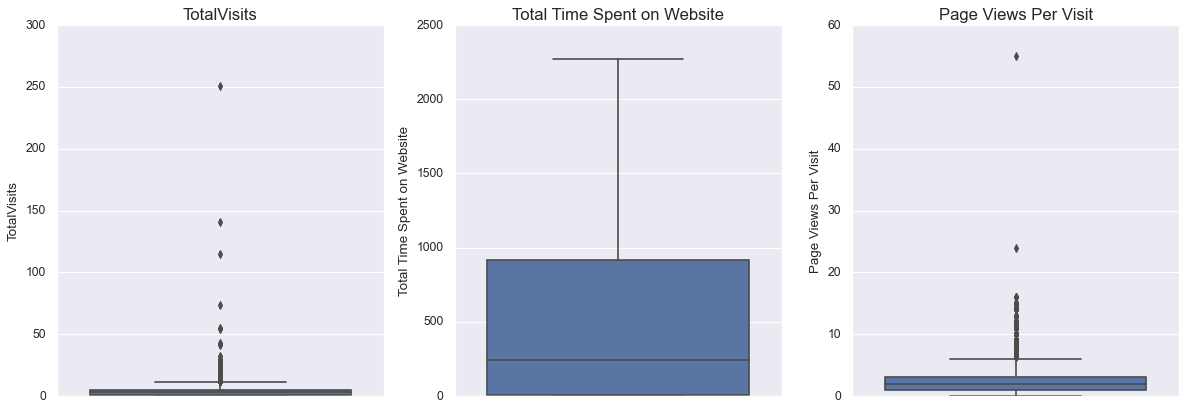

In [38]:
temp_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = [15,15])
for i in enumerate(temp_col):
    plt.subplot(3, 3, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = xleads_01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()    
plt.show()

#### Insights from the Graph:
* We can observe that there are a lot of outliers present in the dataset, so we will have to 

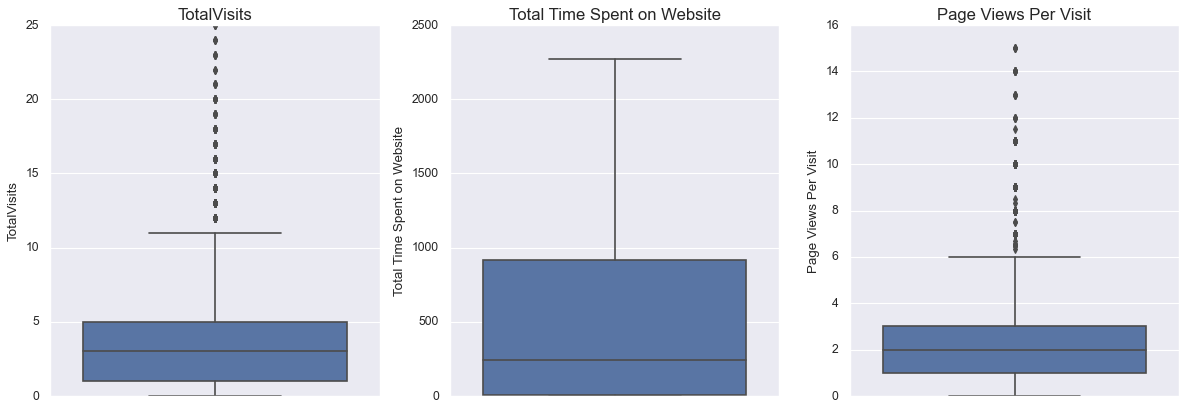

In [39]:
# removing (statistical) outliers
# outlier treatment for 'TotalVisits'.
Q1 = xleads_01.TotalVisits.quantile(0.05)
Q3 = xleads_01.TotalVisits.quantile(0.95)
IQR = Q3 - Q1
xleads_01 = xleads_01[(xleads_01.TotalVisits >= Q1 - 1.5*IQR) & (xleads_01.TotalVisits <= Q3 + 1.5*IQR)]

# outlier treatment for 'Page Views Per Visit'.
Q1 = xleads_01['Page Views Per Visit'].quantile(0.05)
Q3 = xleads_01['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
xleads_01 = xleads_01[(xleads_01['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (xleads_01['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

temp_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize = [15,15])
for i in enumerate(temp_col):
    plt.subplot(3, 3, i[0]+1)
    sns.set_style('darkgrid')
    sns.boxplot(i[1], data = xleads_01, orient = 'v')
    plt.title(i[1], fontsize = 15)

plt.tight_layout()    
plt.show()

## *4. Exploratory Data Analysis.*

### *4.1 Univariative Analysis with Categorical Variables.*

In [40]:
# Definition for 'Countplot' to compare the distribution among the Categorical variables.
def countplot(i,R):
    plt.figure(figsize = (15,6))
    
    sns.set_style('darkgrid')
    sns.countplot(i, data = xleads_01, hue = 'Converted')
    plt.title('Distribution of Leads in {} '.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R)
    plt.ylabel('Count', fontsize = 15)
    plt.show()

In [41]:
# Checking the % of Data that has Converted Values = 1:

Converted = (sum(xleads_01['Converted'])/len(xleads_01['Converted'].index))*100
Converted

38.05221989644156

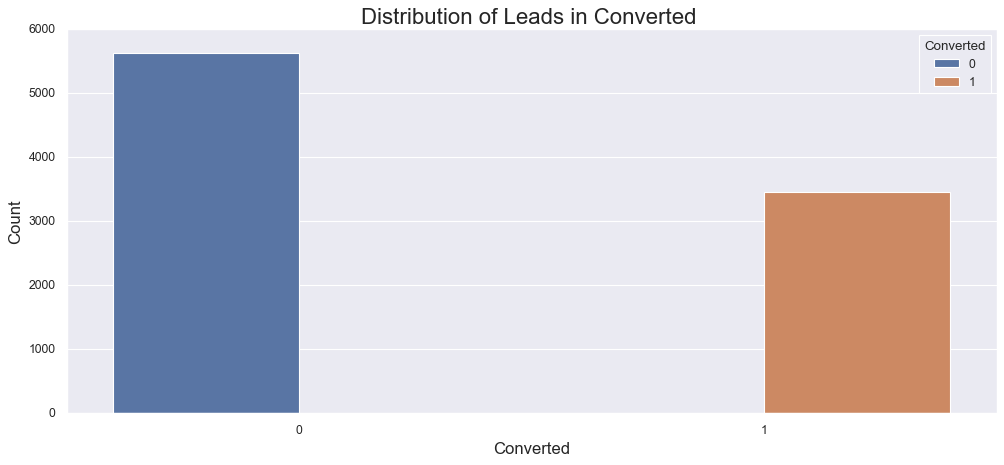

In [42]:
countplot('Converted', 0)

#### Insights from the Graph:
* We can observe that only about 38% of the total Leads are converted. 

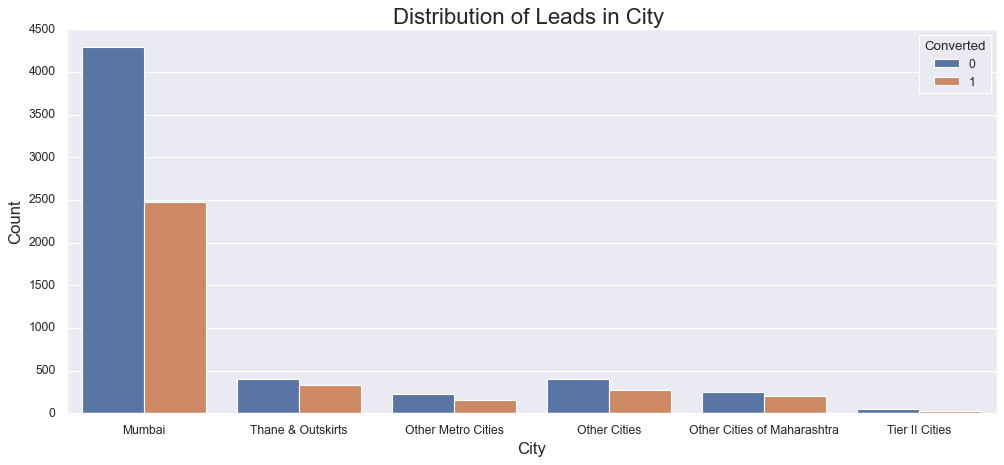

In [43]:
countplot('City', 0)

#### Insights from the Graph:
* We can observe the maximum number of Leads are from *'Mumbai'*.
* Conversion Rate of Leads are high in rest of the Cities when compared to *'Mumbai'*.

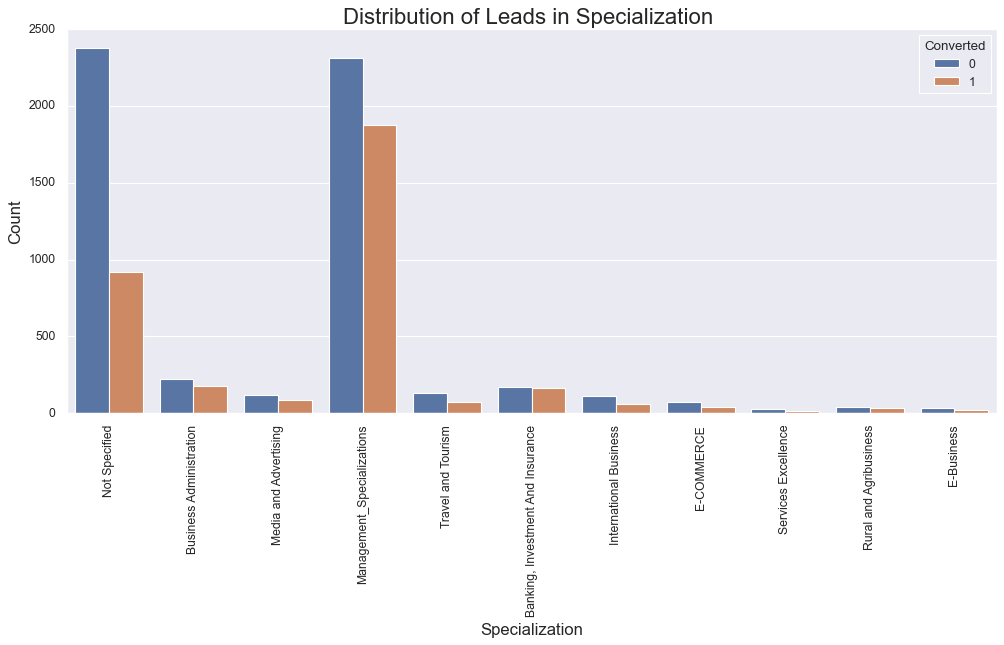

In [44]:
countplot('Specialization', 90)

#### Insights from the Graph:
* Maximum number of Leads are from *'Not Specified'* and *'Specialization'* in Management.
* Conversion rate is higher in *'Management_Specialization'*.

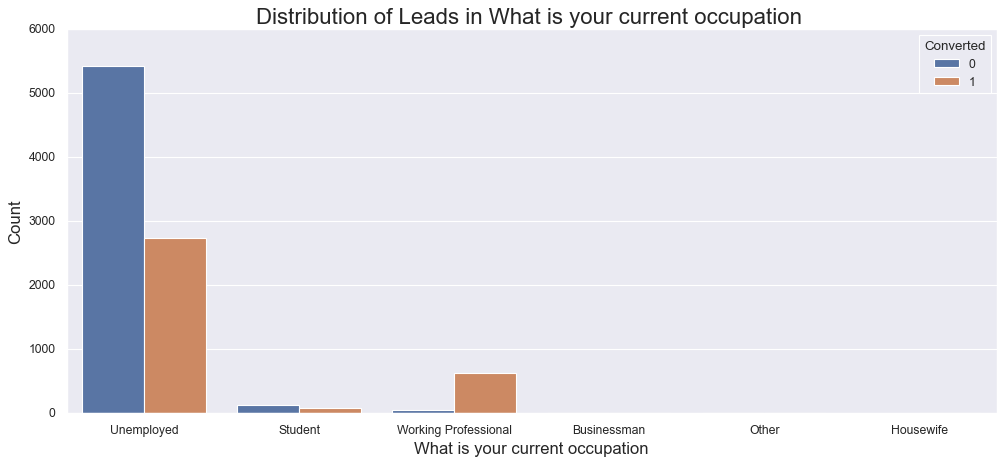

In [45]:
countplot('What is your current occupation', 0)

#### Insights From the Graph:
* As we observe, *'Unemployed'* have a higher chance of getting converted, also they are high number of Leads who are applying for the XEducation.
* Even though *'Working Professionals'* have a less number of applications but, there rate of getting converted is higher.

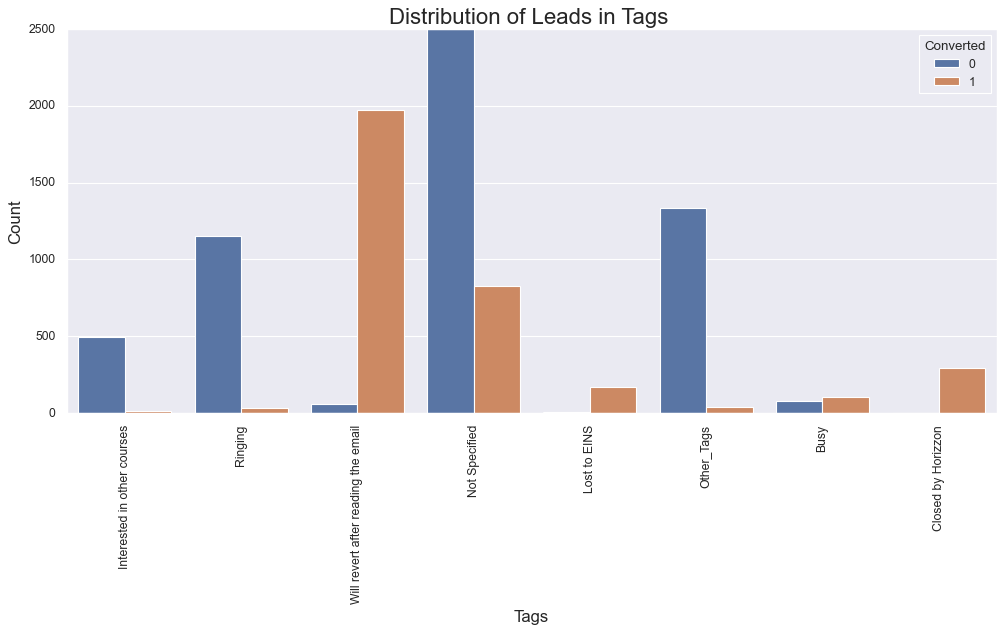

In [46]:
countplot('Tags', 90)

#### Insights From the Graph:
* As we observe *'Will revert after reading the email'* have a highest chance of getting converted.
* We can observe highest peak in *'Not Specified'*, but even though having a high number of leads the converstion rate is very low.

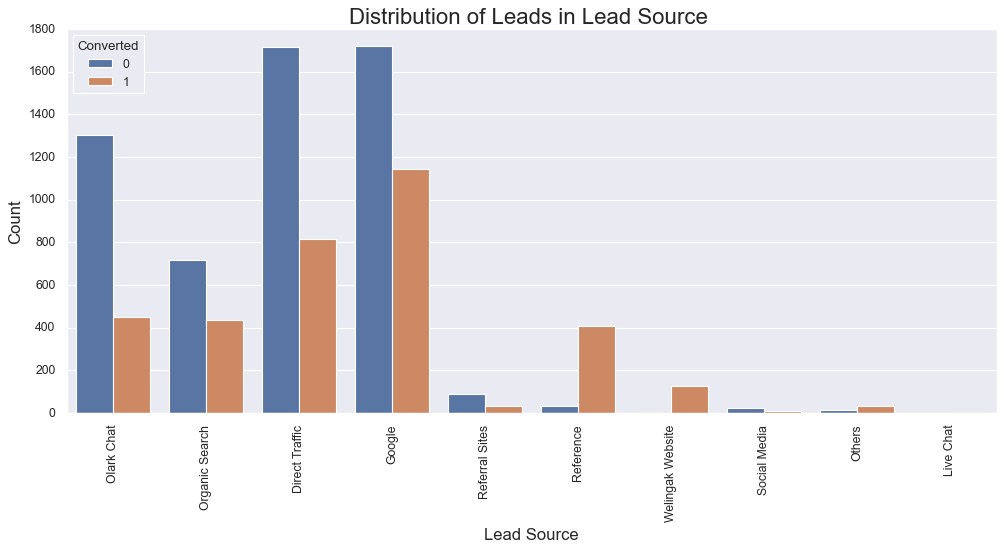

In [47]:
countplot('Lead Source', 90)

#### Insights From the Graph:
* Maximum number of leads are generated by *'Google'* and *'Direct traffic'*.
* Conversion Rate of leads are high in *'Reference'* and *'Welingak Website'*.

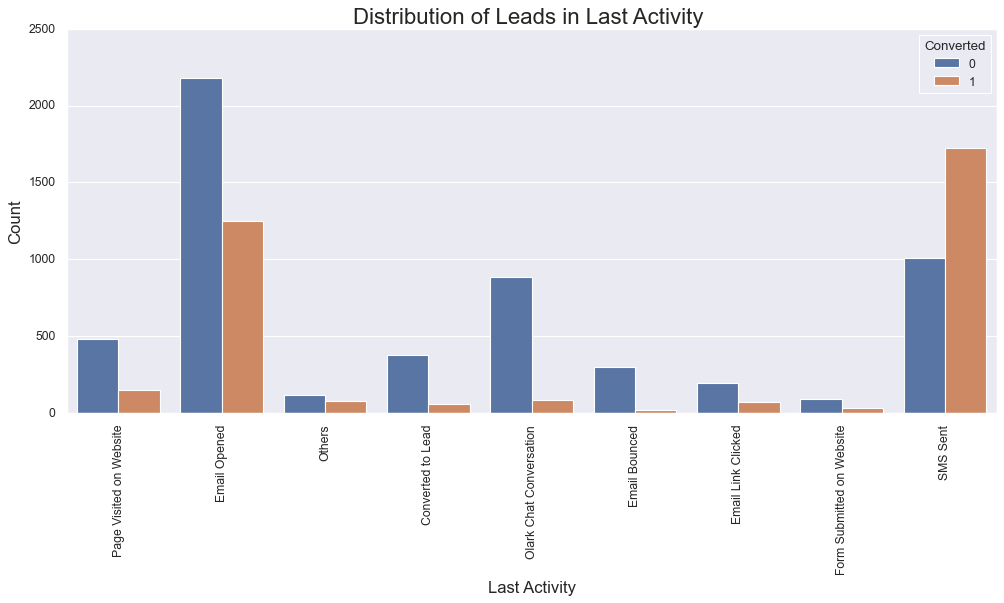

In [48]:
countplot('Last Activity', 90)

#### Insights From the Graph:
* Maximum number of leads are generated by *'Email Opened'* and *'SMS Sent'*, also the coversion rates are higher in both of them.
* Conversion Rate is highest in *'SMS Sent'*.

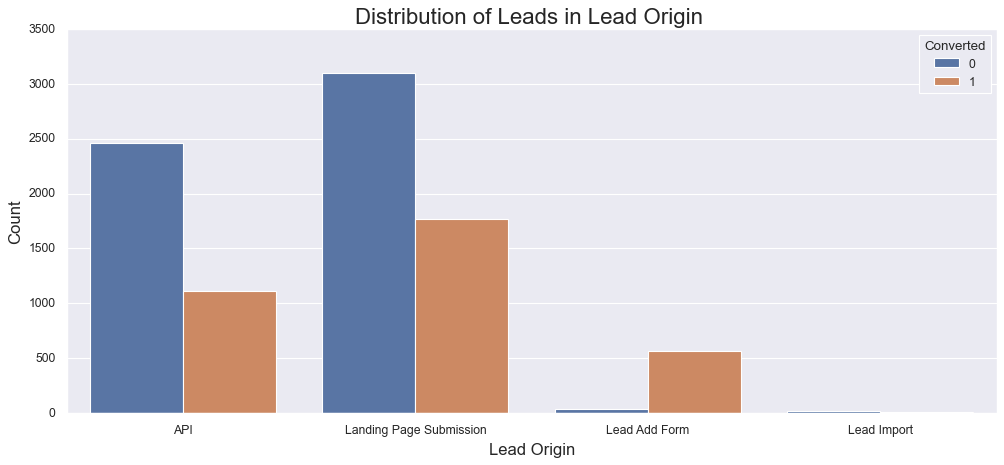

In [49]:
countplot('Lead Origin', 0)

#### Insights From the Graph:
* Maximum number of leads are generated by *'API'* and *'Landing Page Submission'*, also the coversion rates are good in both of them.
* Conversion Rate is highest in *'Lead Add Form'*.

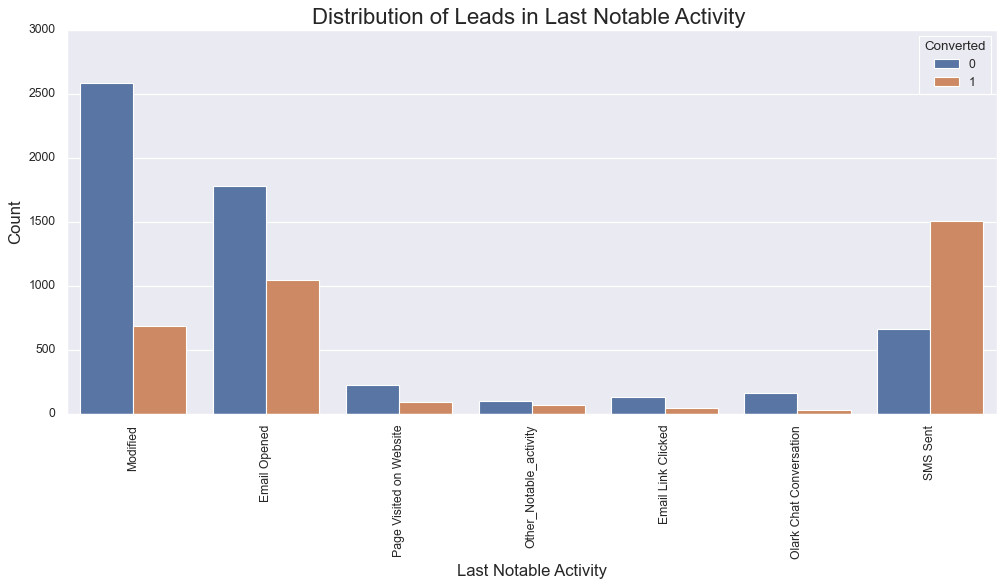

In [50]:
# Let's check the Distributio of 'Last Notable Activity'
countplot('Last Notable Activity', 90)

#### Insights From the Graph:
* Maximum number of leads are generated by *'Modified'*, *'Email Opened'* and *'SMS Sent'*, also the coversion rates are good in both of them.
* Conversion Rate is highest in *'SMS Sent'*.

### *4.2 Univariative Analysis with Numerical Variables.*

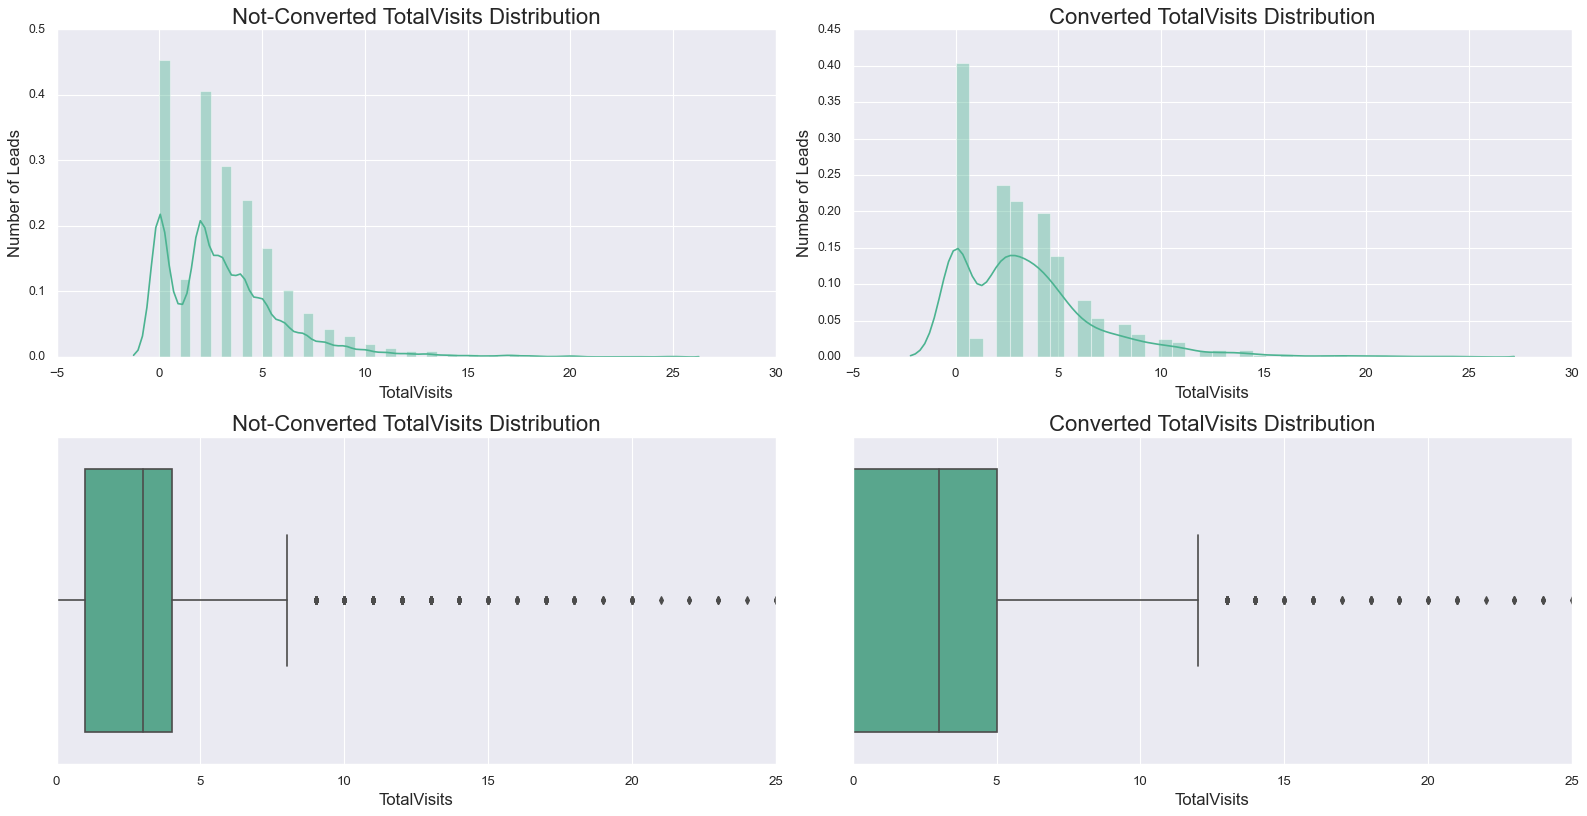

In [51]:
# Splitting the dataframes into two.
Converted_0 = xleads_01[xleads_01.Converted == 0]
Converted_1 = xleads_01[xleads_01.Converted == 1]

def distplot(i,R):
    
    plt.figure(figsize = (20,20))
        
    plt.subplot(4,2,1)
    sns.set_style('darkgrid')
    sns.distplot(Converted_0[~Converted_0[i].isna()][i], color="#4CB391")
    plt.title('Not-Converted {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Leads', fontsize = 15)
    
    plt.subplot(4,2,2)
    sns.set_style('darkgrid')
    sns.distplot(Converted_1[~Converted_1[i].isna()][i], color="#4CB391")
    plt.title('Converted {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    plt.ylabel('Number of Leads', fontsize = 15)
    
    plt.subplot(4,2,3)
    sns.set_style('darkgrid')
    sns.boxplot(Converted_0[~Converted_0[i].isna()][i], color="#4CB391")
    plt.title('Not-Converted {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    
    plt.subplot(4,2,4)
    sns.set_style('darkgrid')
    sns.boxplot(Converted_1[~Converted_1[i].isna()][i], color="#4CB391")
    plt.title('Converted {} Distribution'.format(i), fontsize = 20)
    plt.xlabel(i, fontsize = 15)
    plt.xticks(rotation = R,fontsize = 12)
    
    plt.tight_layout()
    plt.show()
    
    
# Distribution of 'TotalVisits'
distplot('TotalVisits', 0)

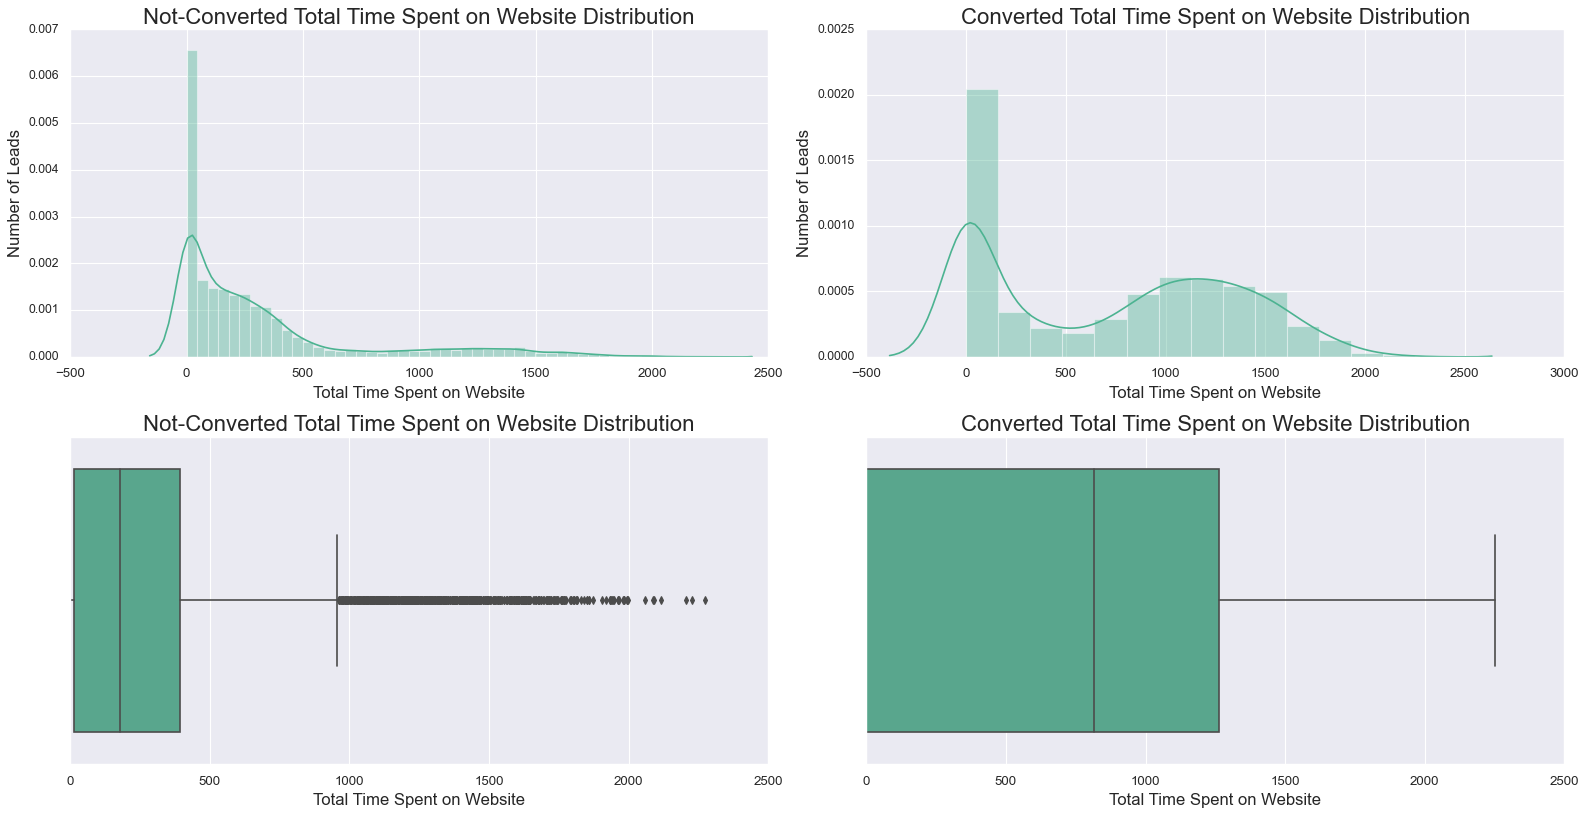

In [52]:
# Distribution of 'Total Time Spent on Website'
distplot('Total Time Spent on Website', 0)

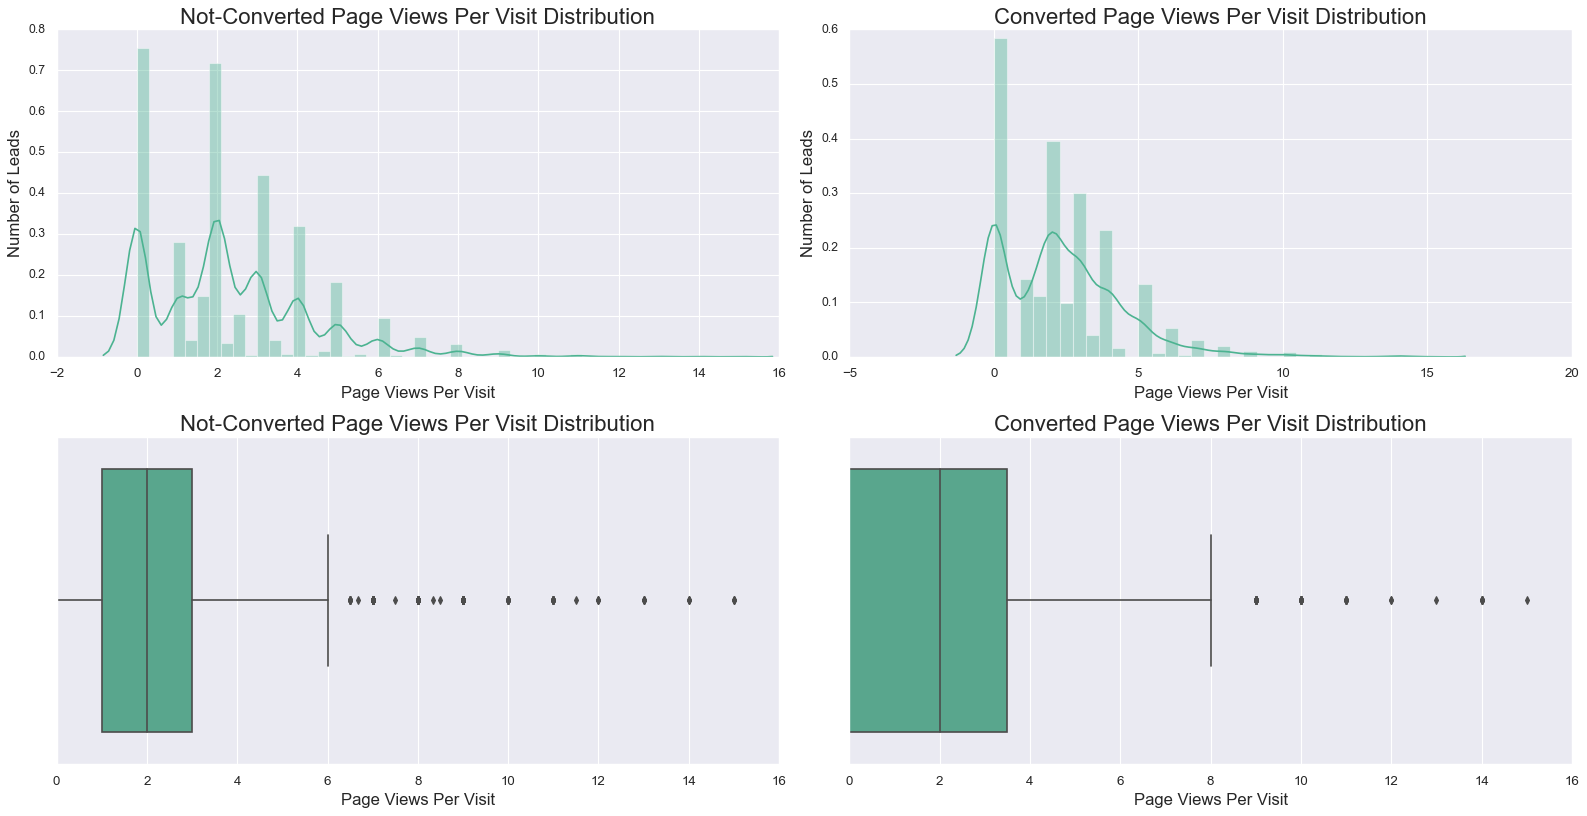

In [53]:
# Distribution of 'Page Views Per Visit'
distplot('Page Views Per Visit', 0)

### *4.2 Bivariative Analysis with Numerical Variables.*

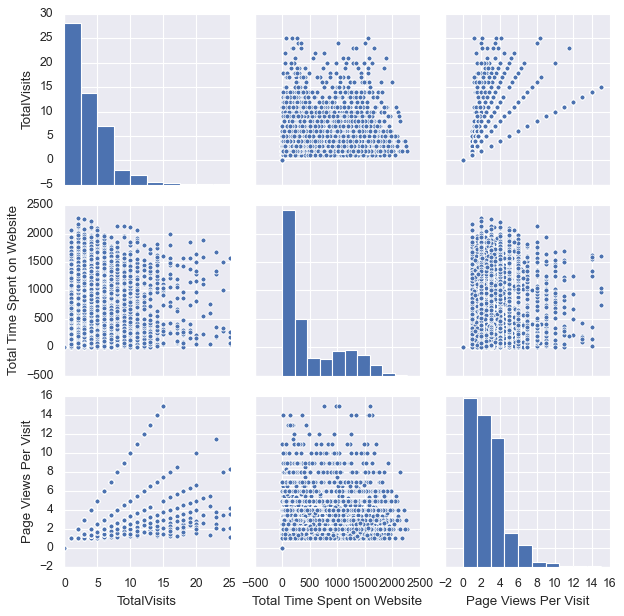

In [54]:
temp = xleads_01[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]      
sns.pairplot(temp)
plt.show()

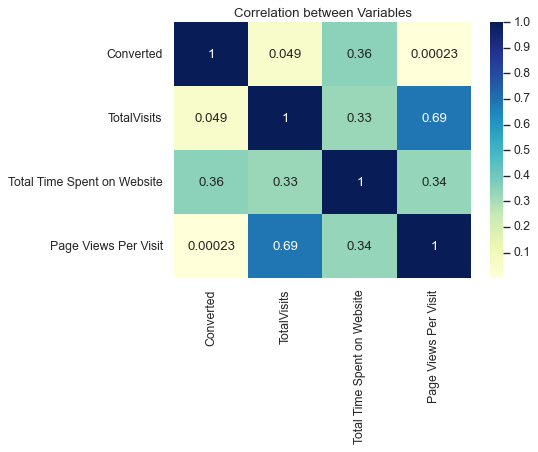

In [55]:
# Heatmap to observe correlation between the variables
plt.figure(figsize=(6, 4))
sns.heatmap(xleads_01.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [56]:
# Renaming some of the column headers for easy understanding

xleads_01.rename(columns={'What is your current occupation': 'Occupation', 
                          'A free copy of Mastering The Interview': 'Interview Free Copy'},inplace = True)

print('Dimension', xleads_01.shape)
xleads_01.head()

Dimension (9077, 14)


,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Tags,City,Interview Free Copy,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No,Modified


#### Insights:
* We will be dropping *'Last Notable Activity' & 'Last Activity'*, since they might be provided by the Sales Team and not present in the Actual Dataset. 

In [57]:
xleads_01.drop(['Last Notable Activity', 'Last Activity'], axis = 1, inplace = True)
xleads_01.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,Occupation,Tags,City,Interview Free Copy
0,API,Olark Chat,No,0,0.0,0,0.0,Not Specified,Unemployed,Interested in other courses,Mumbai,No
1,API,Organic Search,No,0,5.0,674,2.5,Not Specified,Unemployed,Ringing,Mumbai,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Business Administration,Student,Will revert after reading the email,Mumbai,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Media and Advertising,Unemployed,Ringing,Mumbai,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Not Specified,Unemployed,Will revert after reading the email,Mumbai,No


## *5. Data Preparation.*

### *5.1 Creating Dummy Variables.*

In [58]:
#getting a list of categorical columns

cols= xleads_01.select_dtypes(include=['object']).columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Specialization',
       'Occupation', 'Tags', 'City', 'Interview Free Copy'],
      dtype='object')

In [59]:
xleads_01_d = xleads_01
# List of variables to map
varlist =  ['Interview Free Copy','Do Not Email']

# Defining the map function
def map_(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
xleads_01_d[varlist] = xleads_01[varlist].apply(map_)

In [60]:
# Getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(xleads_01[['Lead Origin', 'Occupation', 'City']], drop_first=True)
xleads_01_d = pd.concat([xleads_01_d,dummy],1)

# Getting dummies and dropping 'Specialization_Not Specified' and adding the results to the master dataframe
dummy = pd.get_dummies(xleads_01['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
xleads_01_d = pd.concat([xleads_01_d, dummy], axis = 1)

# Getting dummies and dropping 'Lead Source_Others' and adding the results to the master dataframe
dummy = pd.get_dummies(xleads_01['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
xleads_01_d = pd.concat([xleads_01_d, dummy], axis = 1)

# Getting dummies and dropping 'Tags_Not Specified' and adding the results to the master dataframe
dummy = pd.get_dummies(xleads_01['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
xleads_01_d = pd.concat([xleads_01_d, dummy], axis = 1)

# Dropping the original columns after creating the dummy variables.

xleads_01_d.drop(cols,1,inplace = True)

# Now let's check the Dataset and it's Dimensions.
print('Dimension:', xleads_01_d.shape)
xleads_01_d.head()

Dimension: (9077, 43)


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,1532,2.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,305,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


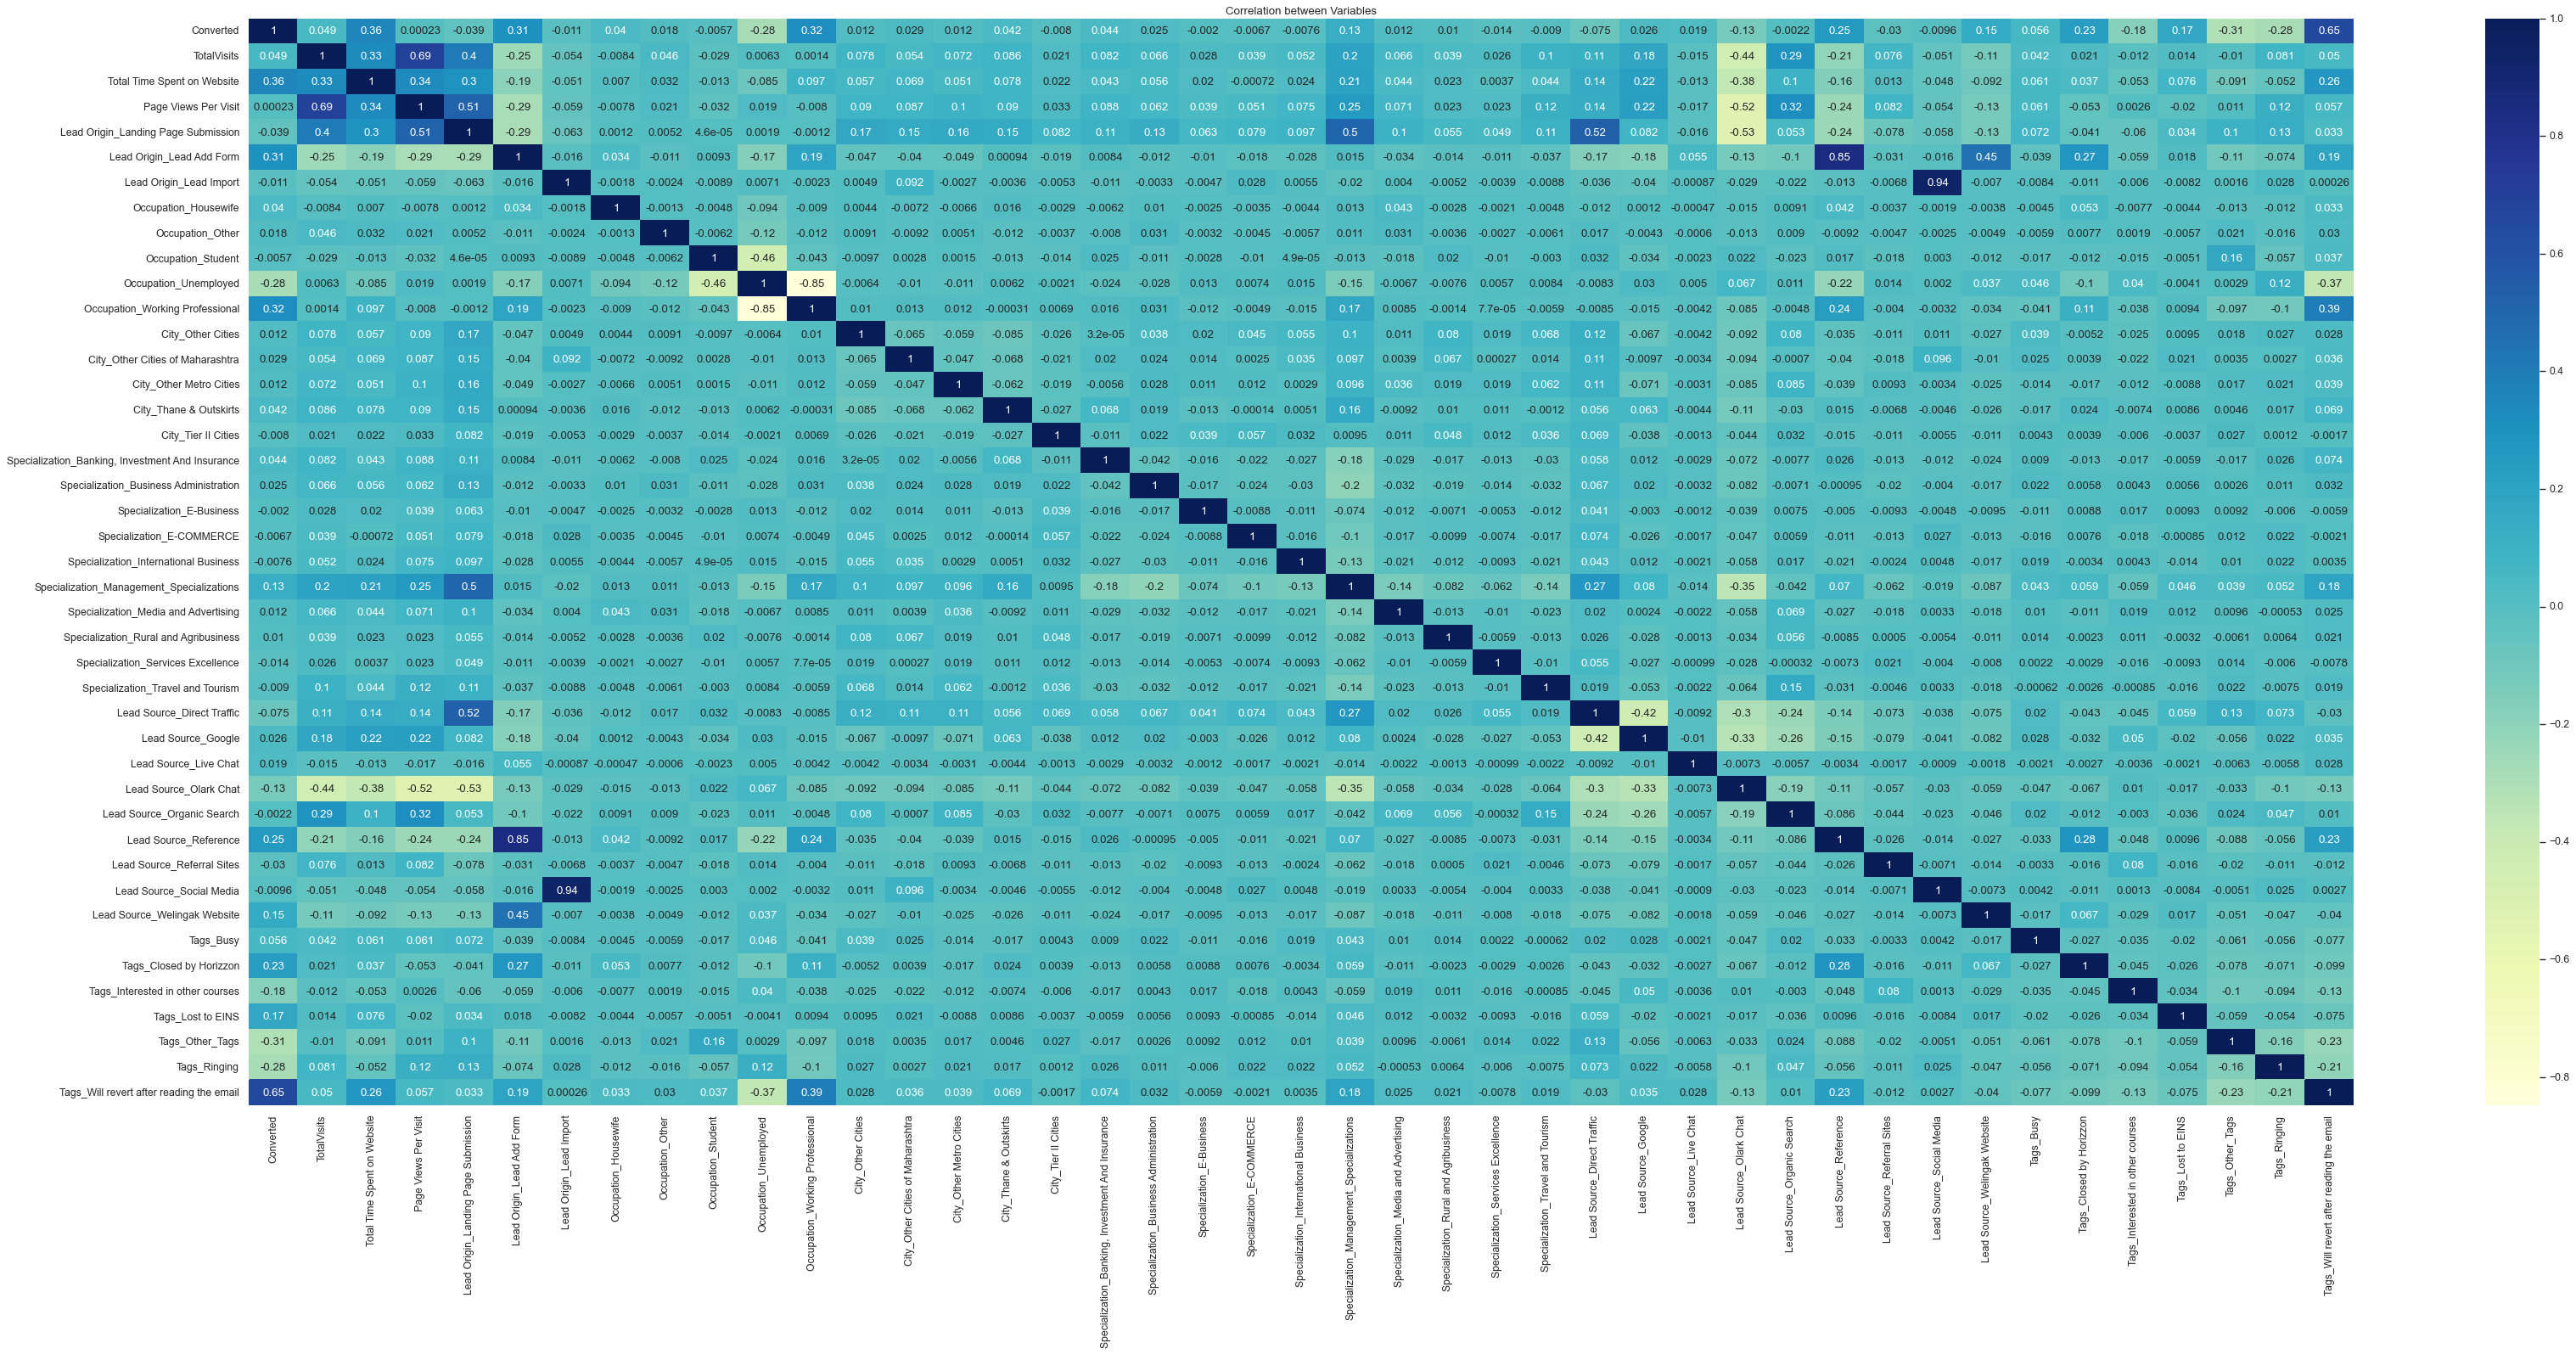

In [61]:
# Heatmap to observe correlation between the variables
plt.figure(figsize=(50, 20))
sns.heatmap(xleads_01_d.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation between Variables")
plt.show()

In [62]:
# columns pairs in order of highest absolute correlation
xleads_01_d.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(25)

Tags_Will revert after reading the email   Tags_Will revert after reading the email    1.000000
Lead Source_Social Media                   Lead Origin_Lead Import                     0.937740
Occupation_Unemployed                      Occupation_Working Professional             0.847542
Lead Origin_Lead Add Form                  Lead Source_Reference                       0.845137
TotalVisits                                Page Views Per Visit                        0.690456
Converted                                  Tags_Will revert after reading the email    0.653347
Lead Origin_Landing Page Submission        Lead Source_Olark Chat                      0.525909
                                           Lead Source_Direct Traffic                  0.524423
Page Views Per Visit                       Lead Source_Olark Chat                      0.523856
Lead Origin_Landing Page Submission        Page Views Per Visit                        0.509580
Specialization_Management_Specialization

### *5.2 Splitting the Data into Training and Testing Sets.*

In [63]:
from sklearn.model_selection import train_test_split

xleads_train, xleads_test = train_test_split(xleads_01_d, train_size = 0.7, random_state = 100)

print('xleads_01 dimensions   :' , xleads_01.shape)
print('xleads_01_d dimensions :' , xleads_01_d.shape)
print('xleads_train dimensions:' , xleads_train.shape)
print('xleads_test dimensions :' , xleads_test.shape)

xleads_01 dimensions   : (9077, 12)
xleads_01_d dimensions : (9077, 43)
xleads_train dimensions: (6353, 43)
xleads_test dimensions : (2724, 43)


In [64]:
# Checking for outliers in the continuous variables
num_xleads_01_d = xleads_01_d[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_xleads_01_d.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9077.000000,9077.000000,9077.000000
mean,3.317285,481.452462,2.343201
std,3.292020,545.340543,2.051961
min,0.000000,0.000000,0.000000
25%,1.000000,8.000000,1.000000
50%,3.000000,244.000000,2.000000
75%,5.000000,920.000000,3.000000
90%,7.000000,1373.000000,5.000000
95%,9.000000,1557.000000,6.000000
99%,16.000000,1839.000000,9.000000


### *5.3 Standardizing Numerical Variables.*`

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Rescaling the Features, so the model can be easily interpreted.
num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
xleads_train[num_vars] = scaler.fit_transform(xleads_train[num_vars])
xleads_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7856,1,1.404951,0.298091,-0.169112,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2257,0,0.199352,-0.246342,0.803807,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
851,1,-0.403448,1.217742,-0.655572,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7141,0,-1.006248,-0.882741,-1.142032,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6337,0,-0.403448,0.000124,-0.169112,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


## *6. Model Building.*

### *6.1 Applying Logistic Regression on the Train Data.*

In [66]:
# Divide the data into X and y
y_train = xleads_train.pop('Converted')
X_train = xleads_train
y_train.head()

7856    1
2257    0
851     1
7141    0
6337    0
Name: Converted, dtype: int64

In [67]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
7856,1.404951,0.298091,-0.169112,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2257,0.199352,-0.246342,0.803807,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
851,-0.403448,1.217742,-0.655572,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7141,-1.006248,-0.882741,-1.142032,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6337,-0.403448,0.000124,-0.169112,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [68]:
### Checking the Converted Rate
Converted = (sum(xleads_01['Converted'])/len(xleads_01['Converted'].index))*100
Converted

38.05221989644156

In [69]:
import statsmodels.api as sm

# Logistic regression model
logm_1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm_1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           42
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1535.5
Date:                Wed, 09 Feb 2022   Deviance:                       3070.9
Time:                        17:36:50   Pearson chi2:                 7.04e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [70]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 18),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Occupation_Housewife', False, 14),
 ('Occupation_Other', False, 6),
 ('Occupation_Student', False, 2),
 ('Occupation_Unemployed', False, 3),
 ('Occupation_Working Professional', True, 1),
 ('City_Other Cities', False, 15),
 ('City_Other Cities of Maharashtra', False, 23),
 ('City_Other Metro Cities', False, 4),
 ('City_Thane & Outskirts', False, 7),
 ('City_Tier II Cities', False, 13),
 ('Specialization_Banking, Investment And Insurance', True, 1),
 ('Specialization_Business Administration', False, 11),
 ('Specialization_E-Business', False, 10),
 ('Specialization_E-COMMERCE', False, 8),
 ('Specialization_International Business', False, 19),
 ('Specialization_Management_Specializations', False, 12),
 ('Specialization_Media and Advertising', False

In [71]:
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [72]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Occupation_Housewife',
       'Occupation_Other', 'Occupation_Student', 'Occupation_Unemployed',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Social Media'],
      dtype='object')

In [73]:
X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
logm_2 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
res_2 = logm_2.fit()
print(res_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1547.4
Date:                Wed, 09 Feb 2022   Deviance:                       3094.8
Time:                        17:36:53   Pearson chi2:                 6.75e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,18.42
10,Lead Source_Reference,14.15
12,Lead Source_Welingak Website,5.16
19,Tags_Will revert after reading the email,1.96
7,Lead Source_Direct Traffic,1.73
8,Lead Source_Google,1.60
17,Tags_Other_Tags,1.40
18,Tags_Ringing,1.40
3,Occupation_Working Professional,1.34
9,Lead Source_Organic Search,1.32


In [75]:
# Getting the predicted values on the train set
y_train_pred = res_2.predict(X_train_sm)
y_train_pred[:10]

7856    0.943508
2257    0.018885
851     0.986780
7141    0.014611
6337    0.005955
3684    0.018865
377     0.711580
2919    0.009165
1013    0.021568
4292    0.989103
dtype: float64

In [76]:
# Creating a dataframe with the actual churn flag and the predicted probabilities.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
7856,1,0.943508,7856
2257,0,0.018885,2257
851,1,0.986780,851
7141,0,0.014611,7141
6337,0,0.005955,6337


In [77]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0.
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
7856,1,0.943508,7856,1
2257,0,0.018885,2257,0
851,1,0.986780,851,1
7141,0,0.014611,7141,0
6337,0,0.005955,6337,0


In [78]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3752  162]
 [ 442 1997]]


In [79]:
# Predicted     not_Converted       Converted
# Actual
# not_Converted        3752            162
# Converted            442            1997  

In [80]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9049268062332756


In [81]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('-------------------------------------------------')
print('Sensitivity               :', TP / float(TP+FN))
print('-------------------------------------------------')
print('Specificity               :', TN / float(TN+FP))
print('-------------------------------------------------')
print('False postive rate        :', FP/ float(TN+FP))
print('-------------------------------------------------')
print('Positive predictive value :', TP / float(TP+FP))
print('-------------------------------------------------')
print('Negative predictive value :', TN / float(TN+ FN))
print('-------------------------------------------------')

-------------------------------------------------
Sensitivity               : 0.8187781877818778
-------------------------------------------------
Specificity               : 0.9586101175268268
-------------------------------------------------
False postive rate        : 0.041389882473173226
-------------------------------------------------
Positive predictive value : 0.9249652616952293
-------------------------------------------------
Negative predictive value : 0.8946113495469719
-------------------------------------------------


#### Insights:
* The accuracy of the model built came out to be 92.7%. Let's see if we can improve it.

In [82]:
X_train_rfe = X_train_rfe.drop('Lead Origin_Lead Add Form',axis=1)
X_train_rfe_1 = sm.add_constant(X_train_rfe)

X_train_sm = sm.add_constant(X_train_rfe_1)
logm_3 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
res_3 = logm_3.fit()
print(res_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1555.7
Date:                Wed, 09 Feb 2022   Deviance:                       3111.4
Time:                        17:36:56   Pearson chi2:                 6.74e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,Tags_Will revert after reading the email,1.93
6,Lead Source_Direct Traffic,1.72
7,Lead Source_Google,1.60
9,Lead Source_Reference,1.42
16,Tags_Other_Tags,1.40
17,Tags_Ringing,1.40
2,Occupation_Working Professional,1.34
8,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.24
13,Tags_Closed by Horizzon,1.22


In [84]:
X_train_rfe = X_train_rfe.drop('Lead Origin_Lead Import',axis=1)
X_train_rfe_2 = sm.add_constant(X_train_rfe)

X_train_sm = sm.add_constant(X_train_rfe_2)
logm_4 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
res_4 = logm_4.fit()
print(res_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1556.1
Date:                Wed, 09 Feb 2022   Deviance:                       3112.1
Time:                        17:36:56   Pearson chi2:                 6.74e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
17,Tags_Will revert after reading the email,1.92
5,Lead Source_Direct Traffic,1.72
6,Lead Source_Google,1.60
8,Lead Source_Reference,1.42
16,Tags_Ringing,1.40
15,Tags_Other_Tags,1.40
1,Occupation_Working Professional,1.34
7,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.24
12,Tags_Closed by Horizzon,1.22


In [86]:
X_train_rfe = X_train_rfe.drop('Specialization_Services Excellence',axis=1)
X_train_rfe_3 = sm.add_constant(X_train_rfe)

X_train_sm = sm.add_constant(X_train_rfe_3)
logm_5 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
res_5 = logm_5.fit()
print(res_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1556.7
Date:                Wed, 09 Feb 2022   Deviance:                       3113.4
Time:                        17:36:57   Pearson chi2:                 6.75e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [87]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Tags_Will revert after reading the email,1.92
4,Lead Source_Direct Traffic,1.71
5,Lead Source_Google,1.59
7,Lead Source_Reference,1.42
15,Tags_Ringing,1.40
14,Tags_Other_Tags,1.40
1,Occupation_Working Professional,1.34
6,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.24
11,Tags_Closed by Horizzon,1.22


In [88]:
X_train_rfe = X_train_rfe.drop('Specialization_Banking, Investment And Insurance',axis=1)
X_train_rfe_4 = sm.add_constant(X_train_rfe)

X_train_sm = sm.add_constant(X_train_rfe_4)
logm_6 = sm.GLM(y_train , X_train_sm, family = sm.families.Binomial())
res_6 = logm_6.fit()
print(res_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6353
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1558.2
Date:                Wed, 09 Feb 2022   Deviance:                       3116.3
Time:                        17:36:57   Pearson chi2:                 6.72e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Tags_Will revert after reading the email,1.91
3,Lead Source_Direct Traffic,1.69
4,Lead Source_Google,1.59
6,Lead Source_Reference,1.41
13,Tags_Other_Tags,1.40
14,Tags_Ringing,1.39
1,Occupation_Working Professional,1.34
5,Lead Source_Organic Search,1.31
0,Total Time Spent on Website,1.24
10,Tags_Closed by Horizzon,1.22


#### Insights:
* As we can see all the values are in order. Now we will move on to derive the Probability, Lead Score and final Predictions on Train Data.

In [90]:
y_train_pred = res_6.predict(X_train_sm)

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index

# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0.
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
7856,1,0.945996,7856,1
2257,0,0.019232,2257,0
851,1,0.987360,851,1
7141,0,0.015301,7141,0
6337,0,0.015360,6337,0


In [91]:
# Confusion matrix 
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_2)

[[3752  162]
 [ 449 1990]]


In [92]:
# Predicted     not_Converted       Converted
# Actual
# not_Converted        3752            162
# Converted            449            1990 

In [93]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9038249645836612


#### Insights:
* The accuracy of the model built came out to be 90.4%. Which is not much different from the Accuracy calculated earlier. Also it meets our requirement of getting a model with 80% accuracy or above.

In [94]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

print('-------------------------------------------------')
print('Sensitivity               :', TP / float(TP+FN))
print('-------------------------------------------------')
print('Specificity               :', TN / float(TN+FP))
print('-------------------------------------------------')
print('False postive rate        :', FP/ float(TN+FP))
print('-------------------------------------------------')
print('Positive predictive value :', TP / float(TP+FP))
print('-------------------------------------------------')
print('Negative predictive value :', TN / float(TN+ FN))
print('-------------------------------------------------')

-------------------------------------------------
Sensitivity               : 0.8159081590815909
-------------------------------------------------
Specificity               : 0.9586101175268268
-------------------------------------------------
False postive rate        : 0.041389882473173226
-------------------------------------------------
Positive predictive value : 0.9247211895910781
-------------------------------------------------
Negative predictive value : 0.8931206855510593
-------------------------------------------------


### *6.2  Plotting ROC Curve.*

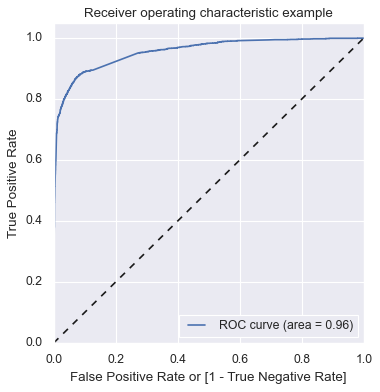

In [95]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### Insights from the Graph:
* The ROC Curve should be a value close to 1. We are getting a value of 0.96, indicating a good predictive model.

### *6.3  Finding the Optimu Cut-Off.*

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7856,1,0.945996,7856,1,1,1,1,1,1,1,1,1,1,1
2257,0,0.019232,2257,0,1,0,0,0,0,0,0,0,0,0
851,1,0.987360,851,1,1,1,1,1,1,1,1,1,1,1
7141,0,0.015301,7141,0,1,0,0,0,0,0,0,0,0,0
6337,0,0.015360,6337,0,1,0,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specifity'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    Specifity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,Accuracy,Sensitivity,Specifity]

print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specifity
0.0          0.0  0.383913     1.000000   0.000000
0.1          0.1  0.731780     0.972120   0.582013
0.2          0.2  0.890603     0.892169   0.889627
0.3          0.3  0.903353     0.874949   0.921053
0.4          0.4  0.904927     0.844608   0.942514
0.5          0.5  0.903825     0.815908   0.958610
0.6          0.6  0.899732     0.784748   0.971385
0.7          0.7  0.895010     0.760558   0.978794
0.8          0.8  0.892334     0.743747   0.984926
0.9          0.9  0.878640     0.701517   0.989014


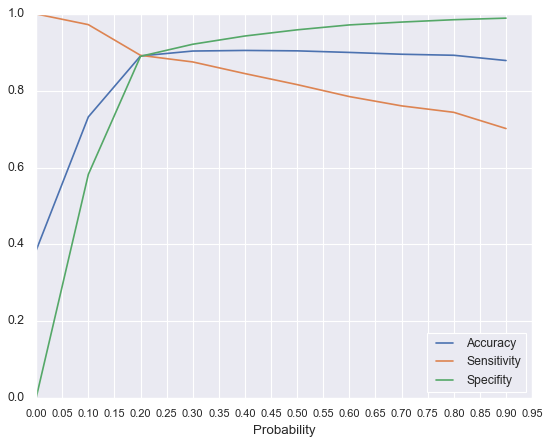

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specifity'])
plt.xticks(np.arange(0,1,step = 0.05),size = 10)
plt.show()

#### Insights from the Graph:
* As we can observe from the above graph, the cut-off came out to be *'0.2'*.
* Also from the *'cutoff_df'* we can see that *'0.3'* has the best values for *'Accuracy', 'Sensitivity' and 'Specifity'*.
* Hence, we will be using *'0.3'* for further analysis.

In [99]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
7856,1,0.945996,7856,1,1,1,1,1,1,1,1,1,1,1,1
2257,0,0.019232,2257,0,1,0,0,0,0,0,0,0,0,0,0
851,1,0.987360,851,1,1,1,1,1,1,1,1,1,1,1,1
7141,0,0.015301,7141,0,1,0,0,0,0,0,0,0,0,0,0
6337,0,0.015360,6337,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_Prob','Prospect ID','Final_Predicted','Lead_Score']].head()

,Converted,Converted_Prob,Prospect ID,Final_Predicted,Lead_Score
7856,1,0.945996,7856,1,95
2257,0,0.019232,2257,0,2
851,1,0.987360,851,1,99
7141,0,0.015301,7141,0,2
6337,0,0.015360,6337,0,2


In [101]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

0.9033527467338265


In [102]:
# Confusion matrix 
confusion_3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted )
print(confusion_3)

[[3605  309]
 [ 305 2134]]


In [103]:
# Predicted     not_Converted       Converted
# Actual
# not_Converted        3482            432
# Converted            263            2176 

In [104]:
TP = confusion_3[1,1] # true positive 
TN = confusion_3[0,0] # true negatives
FP = confusion_3[0,1] # false positives
FN = confusion_3[1,0] # false negatives

print('-------------------------------------------------')
print('Sensitivity               :', TP / float(TP+FN))
print('-------------------------------------------------')
print('Specificity               :', TN / float(TN+FP))
print('-------------------------------------------------')
print('False postive rate        :', FP/ float(TN+FP))
print('-------------------------------------------------')
print('Positive predictive value :', TP / float(TP+FP))
print('-------------------------------------------------')
print('Negative predictive value :', TN / float(TN+ FN))
print('-------------------------------------------------')

-------------------------------------------------
Sensitivity               : 0.8749487494874949
-------------------------------------------------
Specificity               : 0.9210526315789473
-------------------------------------------------
False postive rate        : 0.07894736842105263
-------------------------------------------------
Positive predictive value : 0.8735161686451085
-------------------------------------------------
Negative predictive value : 0.921994884910486
-------------------------------------------------


In [105]:
from sklearn.metrics import precision_score, recall_score

print('precision_score:' , precision_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))
print('recall_score   :' ,  recall_score(y_train_pred_final.Converted, y_train_pred_final.Final_Predicted))

precision_score: 0.8735161686451085
recall_score   : 0.8749487494874949


#### Insights:
* With a current Cut-Off of *'0.3'* we have a **Precision Score: 83.43%** and **Recall Score: 89.21%**.

In [106]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Final_Predicted

(7856    1
 2257    0
 851     1
 7141    0
 6337    0
 3684    0
 377     1
 2919    0
 1013    0
 4292    1
 7286    0
 7992    0
 1283    1
 5693    0
 3581    0
 7261    0
 1251    0
 1431    0
 2176    0
 7284    0
 8775    0
 7647    0
 7428    0
 422     1
 3141    0
 8559    0
 6247    0
 6198    0
 1308    1
 2487    1
 2249    1
 8821    0
 2197    1
 4084    0
 1612    1
 2960    1
 1237    0
 7668    0
 1733    0
 5209    0
 7027    0
 8847    0
 1551    0
 342     0
 1189    1
 280     0
 3762    1
 2206    0
 5651    1
 8356    0
 7124    0
 7661    0
 7279    0
 5823    0
 4671    1
 1240    0
 6292    0
 7497    1
 8076    0
 3215    0
 5459    1
 7545    0
 5556    0
 4218    1
 5213    1
 8205    0
 2410    0
 1810    0
 1138    0
 260     1
 1507    0
 2014    1
 1806    0
 1954    0
 5502    1
 6933    1
 1356    0
 5429    0
 6875    0
 6659    0
 5152    0
 8579    0
 5732    1
 5421    0
 4779    1
 5859    0
 890     0
 5805    1
 5997    0
 1200    1
 972     0

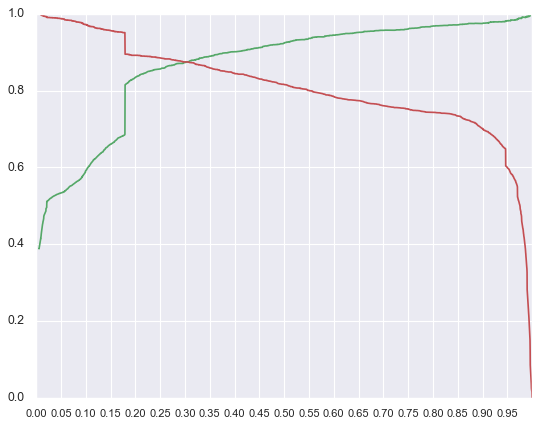

In [107]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step = 0.05),size = 10)
plt.show()

### *6.4  Logestic Regression on Test Data.*

In [108]:
y_test = xleads_test.pop('Converted')
X_test = xleads_test

In [109]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_test = X_test[X_train_rfe.columns]
X_test.head()

,Total Time Spent on Website,Occupation_Working Professional,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email
1342,-0.805490,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8169,-0.577417,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1632,0.408449,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2743,-0.595810,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
6133,-0.882741,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
X_test_sm = sm.add_constant(X_test)

y_test_pred = res_6.predict(X_test_sm)
y_test_pred[:10]

1342    0.005961
8169    0.012461
1632    0.017039
2743    0.012218
6133    0.179022
9057    0.011162
2736    0.009012
1196    0.007948
2363    0.012194
3128    0.095750
dtype: float64

In [111]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Let's see the head
y_pred_1.head()

,0
1342,0.005961
8169,0.012461
1632,0.017039
2743,0.012218
6133,0.179022


In [112]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,1342,1,0.005961
1,8169,0,0.012461
2,1632,0,0.017039
3,2743,0,0.012218
4,6133,0,0.179022


In [113]:
y_pred_final['Final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,Final_Predicted
0,1342,1,0.005961,0
1,8169,0,0.012461,0
2,1632,0,0.017039,0
3,2743,0,0.012218,0
4,6133,0,0.179022,0


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Final_Predicted)

0.9115271659324523

In [115]:
confusion_4 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Final_Predicted )
confusion_4

array([[1602,  107],
       [ 134,  881]], dtype=int64)

In [116]:
# Predicted     not_Converted       Converted
# Actual
# not_Converted        1602             107
# Converted             134             881 

In [117]:
TP = confusion_4[1,1] # true positive 
TN = confusion_4[0,0] # true negatives
FP = confusion_4[0,1] # false positives
FN = confusion_4[1,0] # false negatives

print('-------------------------------------------------')
print('Sensitivity               :', TP / float(TP+FN))
print('-------------------------------------------------')
print('Specificity               :', TN / float(TN+FP))
print('-------------------------------------------------')
print('False postive rate        :', FP/ float(TN+FP))
print('-------------------------------------------------')
print('Positive predictive value :', TP / float(TP+FP))
print('-------------------------------------------------')
print('Negative predictive value :', TN / float(TN+ FN))
print('-------------------------------------------------')

-------------------------------------------------
Sensitivity               : 0.8679802955665025
-------------------------------------------------
Specificity               : 0.9373902867173786
-------------------------------------------------
False postive rate        : 0.06260971328262141
-------------------------------------------------
Positive predictive value : 0.8917004048582996
-------------------------------------------------
Negative predictive value : 0.9228110599078341
-------------------------------------------------


In [118]:
print('precision_score:' , precision_score(y_pred_final.Converted, y_pred_final.Final_Predicted))
print('recall_score   :' ,  recall_score(y_pred_final.Converted, y_pred_final.Final_Predicted))

precision_score: 0.8917004048582996
recall_score   : 0.8679802955665025


#### Insights:
* With a current Cut-Off of *'0.3'* we have a **Precision Score: 89.17%** and **Recall: 86.79%**.

In [119]:
# Let's assign Lead_score for the leads in Test Data Set : 
y_pred_final['Lead_Score']=(y_pred_final['Converted_Prob']*100).astype("int64")
y_pred_final.sort_values(by='Converted_Prob',ascending=False)

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
1931,4662,1,0.999971,1,99
1626,4062,1,0.999939,1,99
2038,818,1,0.999929,1,99
203,5293,1,0.999877,1,99
687,4723,1,0.999845,1,99
554,8103,1,0.999845,1,99
2701,1965,1,0.999834,1,99
954,2984,1,0.999819,1,99
2533,6647,1,0.999712,1,99
669,739,1,0.999697,1,99


In [120]:
# checking the data from top 
y_pred_final.head(5)

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
0,1342,1,0.005961,0,0
1,8169,0,0.012461,0,1
2,1632,0,0.017039,0,1
3,2743,0,0.012218,0,1
4,6133,0,0.179022,0,17


In [121]:
# checking the data from bottom 
y_pred_final.tail(5)

,Prospect ID,Converted,Converted_Prob,Final_Predicted,Lead_Score
2719,2336,1,0.179022,0,17
2720,6790,0,0.017487,0,1
2721,6287,0,0.021321,0,2
2722,8489,0,0.028679,0,2
2723,7268,1,0.988914,1,98


In [122]:
pd.options.display.float_format = '{:.2f}'.format
final_parameters = res_6.params[1:]
final_parameters.sort_values(ascending = False)

Tags_Closed by Horizzon                     5.29
Tags_Lost to EINS                           5.22
Lead Source_Welingak Website                5.01
Tags_Will revert after reading the email    4.40
Lead Source_Reference                       1.70
Tags_Busy                                   1.35
Total Time Spent on Website                 1.09
Occupation_Working Professional             0.95
Lead Source_Google                         -0.80
Lead Source_Organic Search                 -0.84
Specialization_Travel and Tourism          -0.92
Lead Source_Referral Sites                 -1.12
Lead Source_Direct Traffic                 -1.29
Tags_Other_Tags                            -2.30
Tags_Ringing                               -2.38
Tags_Interested in other courses           -2.64
dtype: float64

## *Conclusion.*

It was found that the variables that mattered the most in the potential buyers are (In descending order) :
* When 'Tag' was:
  1. Closed by Horizzon
  2. Lost to EINS
  3. Will revert after reading the email
* When 'Lead Source' was:
  1. Welingak Website
  2. Reference
* When Occupation was:
  1. Working Professional
* When Specialization was :
  1. Travel and Tourism 
  
***Let us compare the values obtained for Train & Test:***

**Train Data:** 

Accuracy    : 90.33%

Sensitivity : 87.50%

Specificity : 92.10%

**Test Data:**

Accuracy    : 91.15%

Sensitivity : 86.8%

Specificity : 93.74%